(1) Perform statistical analysis., <br>
(2) Comment on or discuss the analysis results., <br>
(3) Implement a machine learning or deep learning model (regression or classification)., <br>
(4) Evaluate the model's performance., <br>
(5) Visualize the model's results., <br>
(6) Comment on and discuss the model's results., <br>
(7) Write a report.

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from scipy.stats import test_ind

In [271]:
df = pd.read_excel('ncaa.xlsx')
df 

,Year,Team,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,...,AdjO,AdjD,AdjT,Luck,SOS AdjEM,OppO,OppD,NCSOS AdjEM,Seed,Made Round of 16
0,2023,Alabama,37,31,6,0.838,23.19,9.65,16,2,...,115.5,88.2,72.6,0.057,11.07,110.2,99.2,10.46,1,1
1,2023,Arizona,35,28,7,0.800,19.08,8.34,14,6,...,118.2,96.3,72.0,0.027,8.32,107.5,99.2,3.12,2,0
2,2023,Arizona State,36,23,13,0.639,11.29,8.18,11,9,...,109.0,95.8,68.1,0.047,8.40,108.4,100.0,0.78,11,0
3,2023,Arkansas,36,22,14,0.611,15.99,9.87,8,10,...,112.1,94.0,69.6,-0.042,10.29,109.7,99.4,3.24,8,1
4,2023,Auburn,34,21,13,0.618,14.35,9.29,10,8,...,112.5,95.7,67.6,-0.018,9.68,109.4,99.7,3.38,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2012,Virginia Commonwealth,36,29,7,0.806,8.79,0.63,15,3,...,106.9,93.5,65.0,0.024,0.53,101.9,101.4,1.90,12,0
702,2012,West Virginia,33,19,14,0.576,12.13,7.53,9,9,...,111.4,97.9,64.0,-0.019,8.32,107.3,99.0,2.04,10,0
703,2012,Western Kentucky,35,16,19,0.457,-2.66,0.51,7,9,...,97.8,100.5,67.9,0.083,0.00,102.3,102.3,2.63,16,0
704,2012,Wichita State,33,27,6,0.818,17.42,3.80,16,2,...,116.1,93.8,65.7,-0.017,3.97,105.1,101.2,3.50,5,0


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 706 non-null    int64  
 1   Team                 706 non-null    object 
 2   G                    706 non-null    int64  
 3   W                    706 non-null    int64  
 4   L                    706 non-null    int64  
 5   W-L%                 706 non-null    float64
 6   SRS                  706 non-null    float64
 7   SOS                  706 non-null    float64
 8   Conf. W              706 non-null    int64  
 9   Conf. L              706 non-null    int64  
 10  Home W               706 non-null    int64  
 11  Home L               706 non-null    int64  
 12  Away W               706 non-null    int64  
 13  Away L               706 non-null    int64  
 14  Team Points          706 non-null    int64  
 15  Opp Points           706 non-null    int

In [273]:
# Check for missing values in each variable
df.isnull().sum()

Year                   0
Team                   0
G                      0
W                      0
L                      0
W-L%                   0
SRS                    0
SOS                    0
Conf. W                0
Conf. L                0
Home W                 0
Home L                 0
Away W                 0
Away L                 0
Team Points            0
Opp Points             0
FG%                    0
3P%                    0
FT%                    0
Home win rate          0
Away win rate          0
Conference win rate    0
Point diff %           0
AdjEM                  0
AdjO                   0
AdjD                   0
AdjT                   0
Luck                   0
SOS AdjEM              0
OppO                   0
OppD                   0
NCSOS AdjEM            0
Seed                   0
Made Round of 16       0
dtype: int64

## biểu đồ cột cho số lần tham gia của các đội

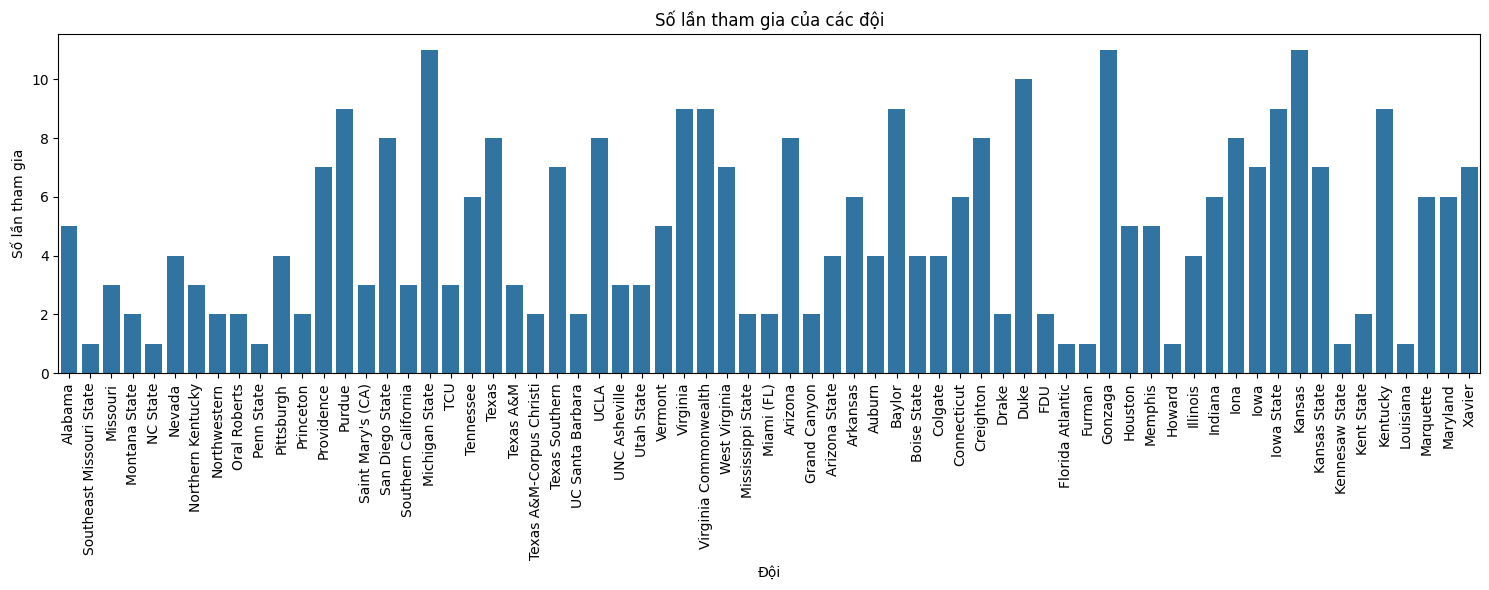

In [274]:
team_counts = pd.DataFrame()

for year in df['Year'].unique():
    # Lọc dữ liệu cho từng năm
    year_df = df[df['Year'] == year]
    # Đếm số lần tham gia của mỗi đội trong năm đó
    counts = year_df['Team'].value_counts()
    # Thêm vào DataFrame mới
    team_counts[year] = counts
    
# Tính tổng số lần tham gia của mỗi đội
team_counts['Total'] = team_counts.sum(axis=1)

# Tìm đội tham gia nhiều nhất
most_participated_teams = team_counts['Total'].idxmax()
max_participations = team_counts['Total'].max()

# Vẽ biểu đồ cột cho số lần tham gia của các đội
plt.figure(figsize=(15, 6))
sns.barplot(x=team_counts.index, y='Total', data=team_counts)
plt.xticks(rotation=90)
plt.xlabel('Đội')
plt.ylabel('Số lần tham gia')
plt.title('Số lần tham gia của các đội')
plt.tight_layout()
plt.show()

## biểu đồ cột cho top 10 đội có số trận thắng trung bình cao nhất

C:\Users\quanghung\AppData\Local\Temp\ipykernel_30716\877713202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_teams.index, y=top_10_teams.values, palette='viridis')


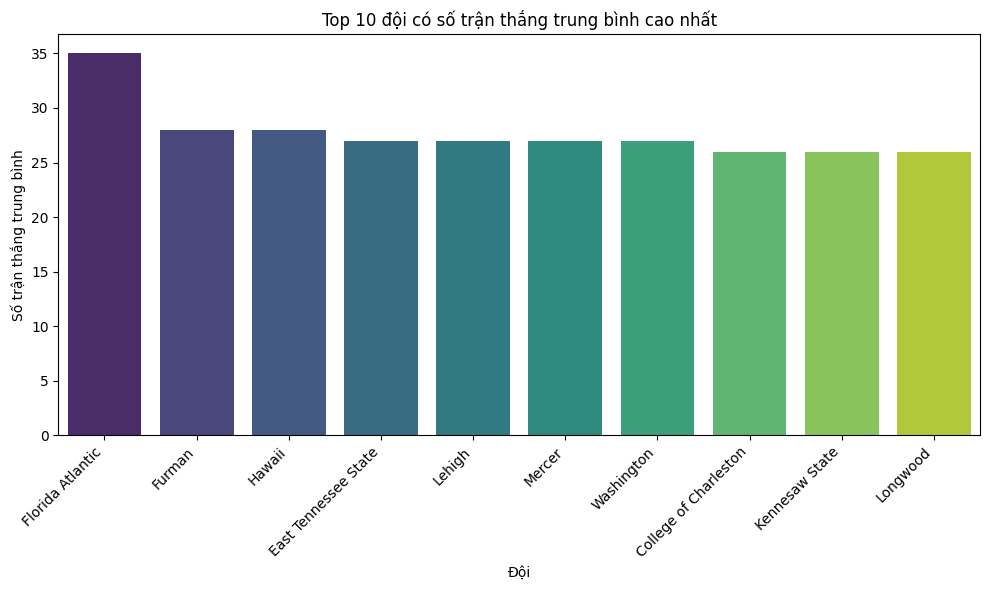

In [275]:
df['Winning Avg'] = df['W'] / df.groupby('Team')['Year'].transform('nunique')

# Lấy top 10 đội có số trận thắng trung bình cao nhất
top_10_teams = df.groupby('Team')['Winning Avg'].mean().nlargest(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_teams.index, y=top_10_teams.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Đội')
plt.ylabel('Số trận thắng trung bình')
plt.title('Top 10 đội có số trận thắng trung bình cao nhất')
plt.tight_layout()
plt.show()

## top 15 đội có chỉ số SRS trung bình cao nhất

C:\Users\quanghung\AppData\Local\Temp\ipykernel_30716\1267962114.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_teams.index, y=top_15_teams.values, palette='mako')


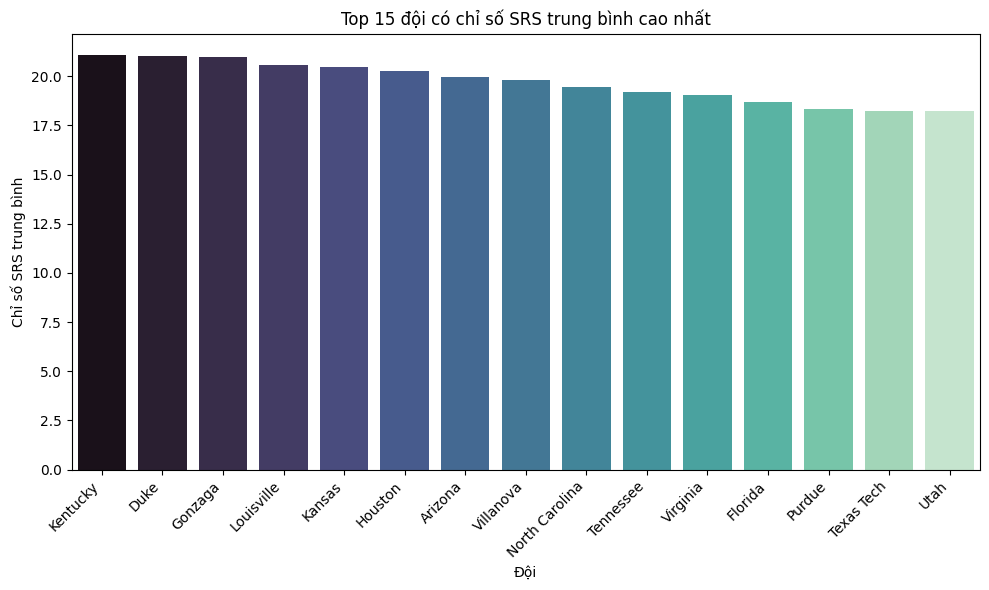

In [276]:
# Tính chỉ số SRS trung bình cho mỗi đội
df['SRS Avg'] = df.groupby('Team')['SRS'].transform('mean')

# Lấy top 15 đội có chỉ số SRS trung bình cao nhất
top_15_teams = df.groupby('Team')['SRS Avg'].mean().nlargest(15)

# Vẽ biểu đồ cột cho top 15 đội có chỉ số SRS trung bình cao nhất
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_teams.index, y=top_15_teams.values, palette='mako')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Đội')
plt.ylabel('Chỉ số SRS trung bình')
plt.title('Top 15 đội có chỉ số SRS trung bình cao nhất')
plt.tight_layout()
plt.show()

In [277]:
# Tiền xử lý data

# Outlier Detection (LOF)
# Identify and handle potential outliers

# Select numerical columns for outlier analysis
df_LOF = df.select_dtypes(include=['float64', 'int64'])

# Create Local Outlier Factor object
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the LOF model to identify outliers
clf.fit_predict(df_LOF)

# Store outlier scores
df_scores = clf.negative_outlier_factor_

# Print missing values after outlier removal
print("\nMissing values for each variable after removing outliers:")
print(df_LOF.isnull().sum())


Missing values for each variable after removing outliers:
Year                   0
G                      0
W                      0
L                      0
W-L%                   0
SRS                    0
SOS                    0
Conf. W                0
Conf. L                0
Home W                 0
Home L                 0
Away W                 0
Away L                 0
Team Points            0
Opp Points             0
FG%                    0
3P%                    0
FT%                    0
Home win rate          0
Away win rate          0
Conference win rate    0
Point diff %           0
AdjEM                  0
AdjO                   0
AdjD                   0
AdjT                   0
Luck                   0
SOS AdjEM              0
OppO                   0
OppD                   0
NCSOS AdjEM            0
Seed                   0
Made Round of 16       0
Winning Avg            0
SRS Avg                0
dtype: int64


In [278]:
np.sort(df_scores)[0:706]

array([-2.49642525, -2.48883266, -2.45676295, -2.11509818, -2.10076208,
       -2.01976975, -2.01305165, -1.98621106, -1.97314913, -1.96951023,
       -1.89487989, -1.87237505, -1.83926472, -1.78899016, -1.78892637,
       -1.78870398, -1.78693626, -1.77376705, -1.73476473, -1.73157048,
       -1.69920952, -1.64428866, -1.60842928, -1.58349196, -1.57914337,
       -1.57570541, -1.52691894, -1.51975553, -1.49661358, -1.4952864 ,
       -1.49330688, -1.48744632, -1.48366107, -1.47656894, -1.4615749 ,
       -1.4551824 , -1.43972712, -1.42204363, -1.41437975, -1.40870603,
       -1.40695349, -1.39618893, -1.39429597, -1.39093688, -1.38831323,
       -1.37718154, -1.3700735 , -1.36855884, -1.36764697, -1.35499664,
       -1.35262032, -1.3507135 , -1.34749134, -1.33798357, -1.33024491,
       -1.32980708, -1.32818763, -1.32603214, -1.32589575, -1.31468517,
       -1.31181135, -1.30893645, -1.30791098, -1.30105495, -1.29908878,
       -1.28759377, -1.28537357, -1.27159283, -1.26834521, -1.26

In [279]:
# Identify outliers based on a threshold
thresh_val = np.sort(df_scores)[15]  # 16th highest (most negative) outlier score

thresh_val

-1.7887039826707938

In [280]:
# Show outlier scores below the threshold
print(df_scores[df_scores < thresh_val][0:100])

[-1.78892637 -2.49642525 -2.11509818 -2.48883266 -1.97314913 -2.10076208
 -1.78899016 -1.98621106 -1.89487989 -2.45676295 -1.87237505 -2.01976975
 -2.01305165 -1.96951023 -1.83926472]


In [281]:
# Extract outliers
outliers = df_LOF[df_scores < thresh_val]
outliers

,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,...,AdjT,Luck,SOS AdjEM,OppO,OppD,NCSOS AdjEM,Seed,Made Round of 16,Winning Avg,SRS Avg
141,2021,24,16,8,0.667,12.49,9.49,10,6,11,...,64.0,0.100,14.39,109.7,95.3,11.60,7,0,8.000000,14.825000
143,2021,16,14,2,0.875,13.66,-1.90,11,1,8,...,72.2,0.048,-5.80,99.6,105.4,-99.00,14,0,3.500000,4.517500
148,2021,20,12,8,0.600,-0.97,-3.92,4,5,3,...,63.9,0.007,-2.28,101.2,103.5,-5.75,16,0,12.000000,-0.970000
159,2021,18,12,6,0.667,-1.20,-6.42,6,3,4,...,67.7,0.030,-5.67,98.3,103.9,-0.54,15,0,1.500000,2.433750
170,2021,23,12,11,0.522,-5.67,-6.67,9,7,6,...,61.6,-0.004,-6.45,99.4,105.9,11.14,16,0,4.000000,-5.426667
185,2021,21,16,5,0.762,13.44,4.49,11,4,8,...,64.8,0.016,8.53,106.6,98.0,2.44,9,0,5.333333,10.186667
198,2021,22,15,7,0.682,12.59,6.50,9,4,10,...,65.7,0.043,9.69,107.9,98.2,0.63,10,0,3.000000,14.694000
218,2019,37,33,4,0.892,27.79,5.01,16,0,17,...,70.2,-0.001,4.46,106.9,102.5,1.87,1,1,3.000000,21.003636
322,2018,36,16,20,0.444,-7.53,-5.53,12,6,8,...,71.7,-0.010,-6.30,101.0,107.3,17.20,16,0,2.285714,-6.905714
326,2018,40,36,4,0.900,26.64,10.24,14,4,12,...,68.7,-0.018,11.31,111.3,100.0,3.98,1,1,4.000000,19.831111


In [282]:
# Pressure Imputation (Replacing outliers)
pressure_val = df_LOF[df_scores == thresh_val]
# Selects the columns containing categorical data (object type) from the original dataframe
df_objects = df.select_dtypes(include=['object'])

In [283]:
# # ---------------------------------------------------------------------------------------------------------------------------------------------------------------
# # Replace outliers with values from the "pressure zone"
# for i in outliers.index:
#     outliers.loc[i] = pressure_val.iloc[0]  # Assuming pressure_val has only 1 row

# # Reconstruct the data with imputed outliers
# df_test = pd.concat([df_objects, df_LOF], axis=1)

# print(df_test.head())
# # -----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [284]:
res = outliers.to_records(index = False)
res

rec.array([(2021, 24, 16,  8, 0.667,  12.49,  9.49, 10,  6, 11, 1, 2,  5, 1558, 1486, 0.425, 0.345, 0.769, 0.92, 0.29, 0.63,  0.05,  15.48, 106.4,  90.9, 64. ,  0.1  , 14.39, 109.7,  95.3,  11.6 ,  7, 0,  8.        ,  14.825     ),
           (2021, 16, 14,  2, 0.875,  13.66, -1.9 , 11,  1,  8, 1, 6,  0, 1363, 1114, 0.493, 0.403, 0.723, 0.89, 1.  , 0.92,  0.22,   9.25, 110.3, 101. , 72.2,  0.048, -5.8 ,  99.6, 105.4, -99.  , 14, 0,  3.5       ,   4.5175    ),
           (2021, 20, 12,  8, 0.6  ,  -0.97, -3.92,  4,  5,  3, 2, 4,  5, 1407, 1348, 0.467, 0.371, 0.78 , 0.6 , 0.44, 0.44,  0.04,   0.67, 106.5, 105.8, 63.9,  0.007, -2.28, 101.2, 103.5,  -5.75, 16, 0, 12.        ,  -0.97      ),
           (2021, 18, 12,  6, 0.667,  -1.2 , -6.42,  6,  3,  4, 2, 4,  3, 1283, 1189, 0.442, 0.346, 0.744, 0.67, 0.57, 0.67,  0.08,  -0.78, 100.2, 101. , 67.7,  0.03 , -5.67,  98.3, 103.9,  -0.54, 15, 0,  1.5       ,   2.43375   ),
           (2021, 23, 12, 11, 0.522,  -5.67, -6.67,  9,  7,  6, 3, 6,  6

In [285]:
res[:] = pressure_val.to_records(index = False)

In [286]:
df_LOF[df_scores < thresh_val] = pd.DataFrame(res,df_LOF[df_scores < thresh_val].index)

In [287]:
df_LOF[df_scores < thresh_val]

,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,...,AdjT,Luck,SOS AdjEM,OppO,OppD,NCSOS AdjEM,Seed,Made Round of 16,Winning Avg,SRS Avg
141,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
143,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
148,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
159,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
170,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
185,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
198,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
218,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
322,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
326,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645


In [288]:
df = pd.concat([df_objects, df_LOF], axis = 1)
df.head(20)

,Team,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,...,AdjT,Luck,SOS AdjEM,OppO,OppD,NCSOS AdjEM,Seed,Made Round of 16,Winning Avg,SRS Avg
0,Alabama,2023,37,31,6,0.838,23.19,9.65,16,2,...,72.6,0.057,11.07,110.2,99.2,10.46,1,1,6.200000,16.698000
1,Arizona,2023,35,28,7,0.800,19.08,8.34,14,6,...,72.0,0.027,8.32,107.5,99.2,3.12,2,0,3.500000,19.942500
2,Arizona State,2023,36,23,13,0.639,11.29,8.18,11,9,...,68.1,0.047,8.40,108.4,100.0,0.78,11,0,5.750000,12.315000
3,Arkansas,2023,36,22,14,0.611,15.99,9.87,8,10,...,69.6,-0.042,10.29,109.7,99.4,3.24,8,1,3.666667,15.488333
4,Auburn,2023,34,21,13,0.618,14.35,9.29,10,8,...,67.6,-0.018,9.68,109.4,99.7,3.38,9,0,5.250000,17.590000
5,Baylor,2023,34,23,11,0.676,17.30,10.54,11,7,...,66.5,0.021,12.33,110.4,98.0,1.31,3,0,2.555556,18.145556
6,Boise State,2023,34,24,10,0.706,12.78,6.21,13,5,...,66.2,0.006,6.85,108.7,101.8,0.93,10,0,6.000000,11.025000
7,Colgate,2023,35,26,9,0.743,2.20,-5.86,17,1,...,67.5,0.015,-6.95,100.9,107.8,-1.23,15,0,6.500000,4.517500
8,Connecticut,2023,39,31,8,0.795,22.95,8.51,13,7,...,66.6,-0.056,10.39,109.7,99.3,-1.75,4,1,5.166667,16.751667
9,Creighton,2023,37,24,13,0.649,17.83,9.80,14,6,...,67.8,-0.068,11.15,111.0,99.8,5.97,6,1,3.000000,15.806250


In [289]:
# Feature Preprocessing (Chọn các đặc trưng để huấn luyện mô hình)
X = df.iloc[:, 1:]  # Select all features except the first column (Team) -> X = df.drop(columns = ['Team'])

Y = df['Made Round of 16']
Y = np.array(Y).reshape(-1, 1)

print(X.shape)
print(Y.shape)

(706, 35)
(706, 1)


In [290]:
# Standardize features (centering and scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction (optional)
pca = PCA()
X_down = pca.fit_transform(X_scaled)

print(X_scaled.shape)
print(X_down.shape)

(706, 35)
(706, 35)


In [291]:
#  Train-Test Split
# Splits the features (X_down - potentially reduced dimensions) and target variable (Y) into training and testing sets for machine learning model evaluation. The training set size is set to 80% (train_size = 0.8).
X_train, X_test, Y_train, Y_test = train_test_split(X_down, Y, train_size = 0.8)

In [292]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [293]:
# K-Nearest Neighbors Regressor (Logistic Regression)
kbr = KNeighborsRegressor()
kbr.fit(X_train, Y_train)
pred = kbr.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(Y_test, pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_test, pred))
# predictions on the test set and store them in pred.
# evaluate the model performance using MSE and MAE for regression.
print(pred)

Mean Squared Error (MSE): 0.01887323943661972
Mean Absolute Error (MAE): 0.04084507042253522
[[0. ]
 [1. ]
 [0. ]
 [1. ]
 [0.2]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [1. ]
 [0. ]
 [0.8]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.6]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [1. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.2]
 [0. ]
 [0. ]
 [0. ]
 [1. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.8]
 [0.8]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [1. ]
 [0. ]
 [0. ]
 [0. ]
 [0.2]
 [1. ]
 [0. ]
 [0. ]
 [1. ]
 [1. ]
 [0. ]
 [0. ]
 [1. ]
 [0. ]
 [1. ]
 [1. ]
 [0.2]
 [0.4]
 [0. ]
 [0. ]
 [0. ]
 [1. ]
 [0. ]
 [0. ]
 [0. ]
 [0.8]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.8]
 [0. ]
 [1. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.4]
 [0. ]
 [0. ]
 [1. ]
 [0. ]
 [1. ]
 [0. ]
 [0.2]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.8]
 [0. ]
 [0. ]
 [0.2]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.

In [294]:
# K-Nearest Neighbors Classifier (binary classification)
kb = KNeighborsClassifier()
kb.fit(X_train, Y_train)
pred = kb.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, pred))
print("F1-score:", f1_score(Y_test, pred))
# Since the target variable is binary ("Made Round of 16")

print(pred)

Accuracy: 0.9788732394366197
F1-score: 0.9411764705882353
[0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


c:\Users\quanghung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [295]:
# TensorFlow Neural Network (Classification)

# Build a deep neural network for classification
model = Sequential([
  # First hidden layer with 128 neurons and ReLU activation
  Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
  # Dropout layer to prevent overfitting (randomly drop 50% of neurons during training)
  Dropout(0.5),
  # Second hidden layer with 64 neurons and ReLU activation
  Dense(64, activation='relu'),
  # Another Dropout layer for regularization
  Dropout(0.5),
  # Output layer with 1 neuron and sigmoid activation for binary classification (0 or 1)
  Dense(1, activation='sigmoid')
])

# Compile the neural network model
# - Optimizer: Adam (efficient for various neural network architectures)
# - Loss function: Binary cross-entropy (suitable for binary classification problems)
# - Metrics: Monitors accuracy during training
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the neural network on the training data
# - Epochs: Number of times to iterate through the entire training data
# - Batch size: Number of samples processed before updating weights
# - Verbose: Controls how much training information is printed (2 for detailed info)
model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2)

# Make predictions on the test data
preds = model.predict(X_test)

new_preds = preds
new_preds[new_preds >= 0.9] = 1
new_preds[new_preds < 0.9] = 0
print(new_preds)

# Evaluate the model's performance on the test data
# - Loss: How well the model minimizes the classification error
# - Accuracy: Percentage of correct predictions
loss, accuracy = model.evaluate(X_test, Y_test)
# print("Accuracy:", accuracy)
# print("F1-score:", f1_score(Y_test, pred))  # From previous classification evaluation

print("F1-score 1:", f1_score(Y_test, pred))
print("F1-score 2:", f1_score(Y_test, new_preds))

print("Accuracy_score:", accuracy_score(Y_test, pred))
print("Accuracy_score:", accuracy_score(Y_test, new_preds))



Epoch 1/20


c:\Users\quanghung\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 - 1s - 49ms/step - accuracy: 0.7021 - loss: 0.5523
Epoch 2/20
18/18 - 0s - 2ms/step - accuracy: 0.8422 - loss: 0.3612
Epoch 3/20
18/18 - 0s - 2ms/step - accuracy: 0.8883 - loss: 0.2907
Epoch 4/20
18/18 - 0s - 2ms/step - accuracy: 0.9309 - loss: 0.2065
Epoch 5/20
18/18 - 0s - 2ms/step - accuracy: 0.9592 - loss: 0.1503
Epoch 6/20
18/18 - 0s - 2ms/step - accuracy: 0.9734 - loss: 0.1082
Epoch 7/20
18/18 - 0s - 2ms/step - accuracy: 0.9894 - loss: 0.0826
Epoch 8/20
18/18 - 0s - 2ms/step - accuracy: 0.9911 - loss: 0.0505
Epoch 9/20
18/18 - 0s - 2ms/step - accuracy: 0.9965 - loss: 0.0353
Epoch 10/20
18/18 - 0s - 2ms/step - accuracy: 0.9929 - loss: 0.0353
Epoch 11/20
18/18 - 0s - 2ms/step - accuracy: 0.9982 - loss: 0.0242
Epoch 12/20
18/18 - 0s - 2ms/step - accuracy: 0.9929 - loss: 0.0265
Epoch 13/20
18/18 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.0139
Epoch 14/20
18/18 - 0s - 2ms/step - accuracy: 0.9982 - loss: 0.0113
Epoch 15/20
18/18 - 0s - 3ms/step - accuracy: 0.9982 - loss: 0.0088

In [296]:
# TensorFlow Neural Network (Logistic Regression)

# Build a similar neural network architecture for regression (predicting continuous values)
model = Sequential([
  Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
  Dropout(0.5),
  Dense(64, activation='relu'),
  Dropout(0.5),
  # Output layer with 1 neuron (no activation for regression)
  Dense(1)
])

# Compile the model for regression
# - Optimizer: Adam
# - Loss function: Mean Absolute Error (MAE) (common metric for regression)
# - Metrics: Monitors MAE during training
model.compile(optimizer='adam',
              loss='mae',  # Changed to 'mae' for mean absolute error
              metrics=['mean_absolute_error'])

# Train the neural network for regression
model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2)

# Make predictions on the test data
preds = model.predict(X_test)

# Evaluate the model's performance on the test data (regression)
# - Loss: MAE between predicted and actual values
# - Mean Absolute Error: Another metric for evaluating regression models
loss, mean_absolute_error = model.evaluate(X_test, Y_test)
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error(Y_test, preds))

print(preds)

Epoch 1/20


c:\Users\quanghung\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 - 1s - 47ms/step - loss: 0.7476 - mean_absolute_error: 0.7476
Epoch 2/20
18/18 - 0s - 2ms/step - loss: 0.6010 - mean_absolute_error: 0.6010
Epoch 3/20
18/18 - 0s - 2ms/step - loss: 0.4968 - mean_absolute_error: 0.4968
Epoch 4/20
18/18 - 0s - 2ms/step - loss: 0.4390 - mean_absolute_error: 0.4390
Epoch 5/20
18/18 - 0s - 2ms/step - loss: 0.4063 - mean_absolute_error: 0.4063
Epoch 6/20
18/18 - 0s - 2ms/step - loss: 0.3468 - mean_absolute_error: 0.3468
Epoch 7/20
18/18 - 0s - 2ms/step - loss: 0.3062 - mean_absolute_error: 0.3062
Epoch 8/20
18/18 - 0s - 2ms/step - loss: 0.2840 - mean_absolute_error: 0.2840
Epoch 9/20
18/18 - 0s - 2ms/step - loss: 0.2362 - mean_absolute_error: 0.2362
Epoch 10/20
18/18 - 0s - 2ms/step - loss: 0.2127 - mean_absolute_error: 0.2127
Epoch 11/20
18/18 - 0s - 2ms/step - loss: 0.1961 - mean_absolute_error: 0.1961
Epoch 12/20
18/18 - 0s - 3ms/step - loss: 0.1919 - mean_absolute_error: 0.1919
Epoch 13/20
18/18 - 0s - 2ms/step - loss: 0.1832 - mean_absolute_error:

In [297]:
df.head(20)

,Team,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,...,AdjT,Luck,SOS AdjEM,OppO,OppD,NCSOS AdjEM,Seed,Made Round of 16,Winning Avg,SRS Avg
0,Alabama,2023,37,31,6,0.838,23.19,9.65,16,2,...,72.6,0.057,11.07,110.2,99.2,10.46,1,1,6.200000,16.698000
1,Arizona,2023,35,28,7,0.800,19.08,8.34,14,6,...,72.0,0.027,8.32,107.5,99.2,3.12,2,0,3.500000,19.942500
2,Arizona State,2023,36,23,13,0.639,11.29,8.18,11,9,...,68.1,0.047,8.40,108.4,100.0,0.78,11,0,5.750000,12.315000
3,Arkansas,2023,36,22,14,0.611,15.99,9.87,8,10,...,69.6,-0.042,10.29,109.7,99.4,3.24,8,1,3.666667,15.488333
4,Auburn,2023,34,21,13,0.618,14.35,9.29,10,8,...,67.6,-0.018,9.68,109.4,99.7,3.38,9,0,5.250000,17.590000
5,Baylor,2023,34,23,11,0.676,17.30,10.54,11,7,...,66.5,0.021,12.33,110.4,98.0,1.31,3,0,2.555556,18.145556
6,Boise State,2023,34,24,10,0.706,12.78,6.21,13,5,...,66.2,0.006,6.85,108.7,101.8,0.93,10,0,6.000000,11.025000
7,Colgate,2023,35,26,9,0.743,2.20,-5.86,17,1,...,67.5,0.015,-6.95,100.9,107.8,-1.23,15,0,6.500000,4.517500
8,Connecticut,2023,39,31,8,0.795,22.95,8.51,13,7,...,66.6,-0.056,10.39,109.7,99.3,-1.75,4,1,5.166667,16.751667
9,Creighton,2023,37,24,13,0.649,17.83,9.80,14,6,...,67.8,-0.068,11.15,111.0,99.8,5.97,6,1,3.000000,15.806250
